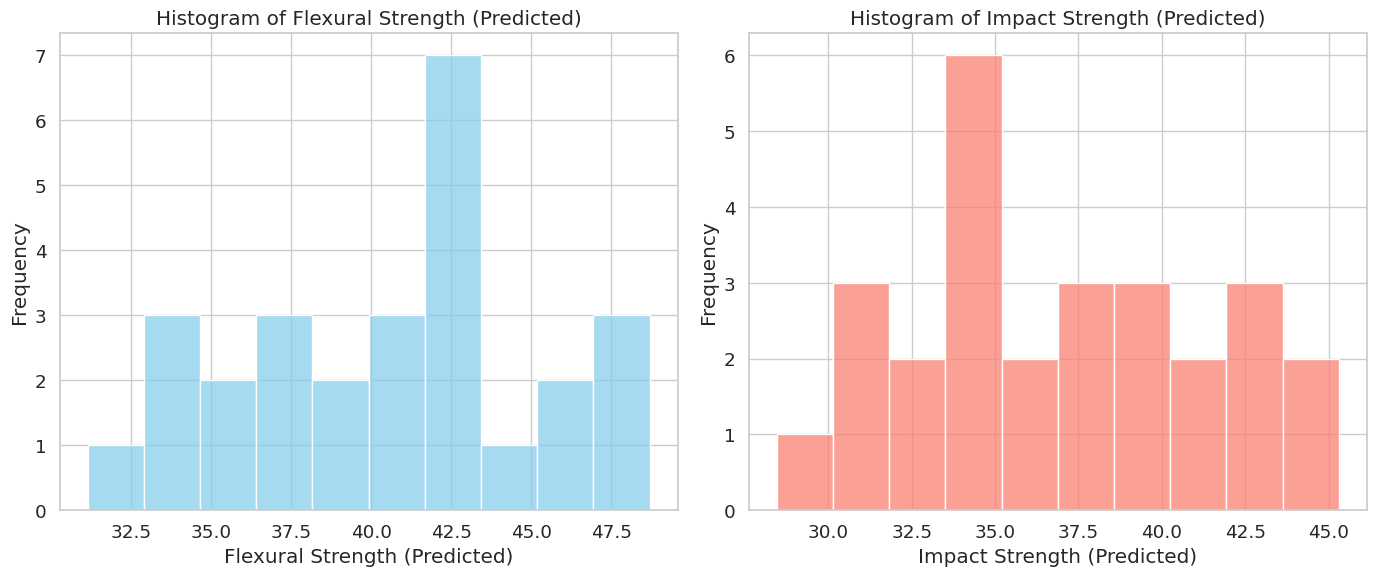

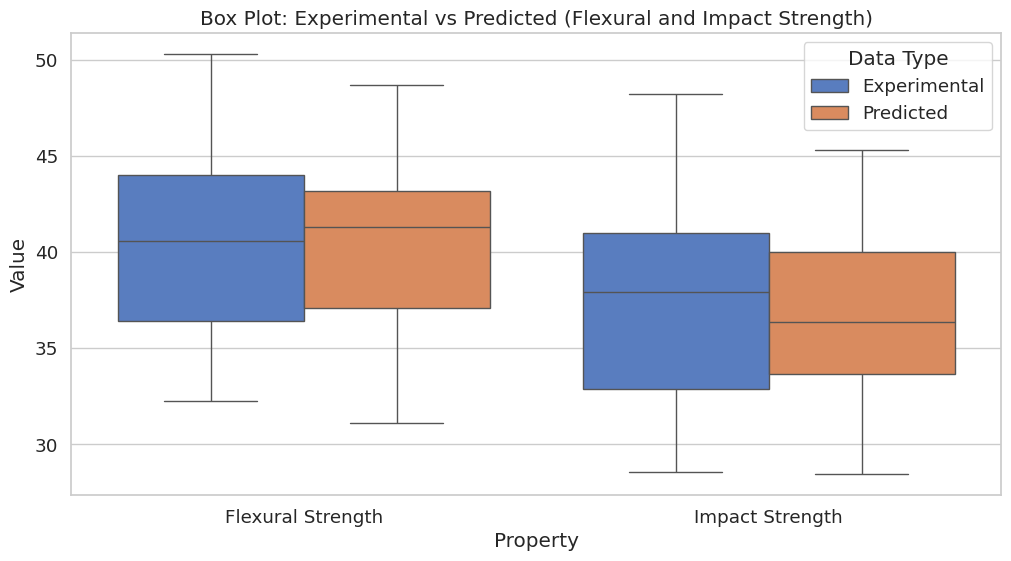

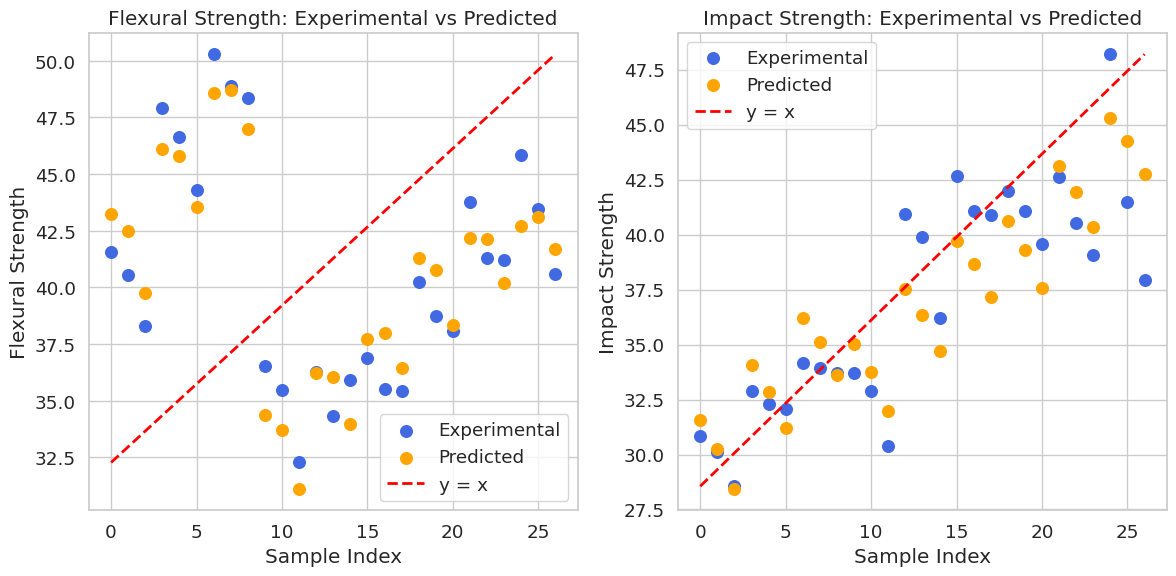

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your CSV file
df = pd.read_csv("hybrid_composites_HybridGWO_ANOVA.csv")

# Set up plotting style
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# --- Histogram plots (no KDE/averaging line) ---
plt.figure(figsize=(14, 6))

# Histogram for Flexural Predicted
plt.subplot(1, 2, 1)
sns.histplot(df["F_Predicted"], kde=False, color="skyblue", bins=10)
plt.title("Histogram of Flexural Strength (Predicted)")
plt.xlabel("Flexural Strength (Predicted)")
plt.ylabel("Frequency")

# Histogram for Impact Strength Predicted
plt.subplot(1, 2, 2)
sns.histplot(df["I_Predicted"], kde=False, color="salmon", bins=10)
plt.title("Histogram of Impact Strength (Predicted)")
plt.xlabel("Impact Strength (Predicted)")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


# --- Box Plots for Experimental vs Predicted ---
plt.figure(figsize=(12, 6))
data_box = pd.DataFrame({
    "Flexural Strength": pd.concat([df["F"], df["F_Predicted"]], ignore_index=True),
    "Impact Strength": pd.concat([df["I"], df["I_Predicted"]], ignore_index=True),
    "Type": ["Experimental"] * len(df) + ["Predicted"] * len(df)
})

sns.boxplot(data=data_box.melt(id_vars="Type"), x="variable", y="value", hue="Type")
plt.title("Box Plot: Experimental vs Predicted (Flexural and Impact Strength)")
plt.xlabel("Property")
plt.ylabel("Value")
plt.legend(title="Data Type")
plt.show()


# --- Experimental vs Predicted Scatter (different colors for exp & pred) ---
plt.figure(figsize=(12, 6))

# Flexural Strength
plt.subplot(1, 2, 1)
plt.scatter(df.index, df["F"], color="royalblue", label="Experimental", s=70)
plt.scatter(df.index, df["F_Predicted"], color="orange", label="Predicted", s=70)
plt.plot([df.index.min(), df.index.max()],
         [df["F"].min(), df["F"].max()],
         color="red", linestyle="--", linewidth=2, label="y = x")
plt.title("Flexural Strength: Experimental vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Flexural Strength")
plt.legend()

# Impact Strength
plt.subplot(1, 2, 2)
plt.scatter(df.index, df["I"], color="royalblue", label="Experimental", s=70)
plt.scatter(df.index, df["I_Predicted"], color="orange", label="Predicted", s=70)
plt.plot([df.index.min(), df.index.max()],
         [df["I"].min(), df["I"].max()],
         color="red", linestyle="--", linewidth=2, label="y = x")
plt.title("Impact Strength: Experimental vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Impact Strength")
plt.legend()

plt.tight_layout()
plt.show()
